<a href="https://colab.research.google.com/github/Maha2646/maha2646.github.io/blob/main/ml(1to7e).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

X, y = make_classification(n_samples=1000, n_features=15, n_classes=2, random_state=42)

df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 16)])
df['Target'] = y
print("First few rows of the dataset:")
print(df.head())

print("Checking for missing values:")
print(df.isnull().sum())

# Step 4: Encode categorical data (in this case, there are no categorical features)
# If categorical features exist, you would use LabelEncoder or OneHotEncoder to encode them.
# Step 5: Splitting the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=42)

# Step 6: Splitting the dataset into k-folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_indices = list(kf.split(df))

# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Let's print out some information to verify everything
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Number of folds:", k)
print("Number of samples in each fold:")
for i, (_, fold_indices) in enumerate(fold_indices):
    print(f"Fold {i+1}: {len(fold_indices)} samples")



First few rows of the dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.572471   1.685432  -1.460302   0.650966   0.418515  -0.076760   
1  -0.231060  -0.338478   0.864070  -1.191875   1.419456  -0.078133   
2   1.089905  -0.173771  -0.802199  -0.571184  -0.816155   0.433768   
3   0.238171   0.653312  -0.072858  -0.840772  -0.987866   0.237337   
4   0.243657  -1.091077  -3.007632  -1.090208   1.284096   0.694764   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0   0.923045  -0.117981  -0.496651    0.187942    0.422046   -0.814153   
1   0.126459   1.943529  -0.915477    0.306135   -0.199075    1.178866   
2   0.301961   0.043829  -1.455055   -1.147160    0.476887    1.868603   
3   0.085513   0.220631   0.723038    1.889279    0.489983   -0.928926   
4  -2.386930  -0.985540  -2.426392    0.571179    0.515074    1.097300   

   Feature_13  Feature_14  Feature_15  Target  
0    0.406094   -1.400229   -1.165202       0  
1

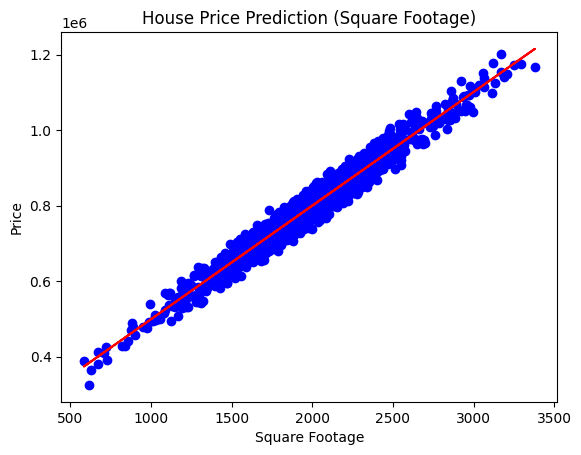

Linear Regression Model:
Mean Squared Error: 114446540.76337169
Coefficients: [  299.0428201  20012.39204881 15033.76064233]

Variance Inflation Factor:
Square Footage     1.002856
Bedrooms           1.000026
Bathrooms          1.002873
Intercept         32.387508
dtype: float64

Ridge Regression Model:
Mean Squared Error: 114446618.84909311
Coefficients: [  299.04423738 20002.06359046 15019.51867294]

LASSO Regression Model:
Mean Squared Error: 114446549.90257102
Coefficients: [  299.04283356 20012.30911549 15033.60934351]

Observations:
- Linear Regression tends to overfit when multicollinearity is present, indicated by high VIF values.
- Ridge regression helps mitigate multicollinearity by penalizing large coefficients.
- LASSO regression can perform feature selection by forcing some coefficients to zero.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Generate synthetic dataset
np.random.seed(0)
num_samples = 1000

square_footage = np.random.normal(2000, 500, num_samples)
num_bedrooms = np.random.randint(2, 6, num_samples)
num_bathrooms = np.random.randint(1, 4, num_samples)
house_price = 100000 + 300 * square_footage + 20000 * num_bedrooms + 15000 * num_bathrooms + np.random.normal(0, 10000, num_samples)

data = pd.DataFrame({
    'Square Footage': square_footage,
    'Bedrooms': num_bedrooms,
    'Bathrooms': num_bathrooms,
    'Price': house_price
})
# Step 2: Split the data into train and test sets
X = data[['Square Footage', 'Bedrooms', 'Bathrooms']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a) Linear Regression Model
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Test the model
y_pred_lr = lr_model.predict(X_test)

# b) Implement univariate Model using Least Squares and plot best-fit line
# Square Footage
X_sqft = X_train['Square Footage'].values.reshape(-1, 1)
lr_model_sqft = LinearRegression()
lr_model_sqft.fit(X_sqft, y_train)

# Predictions
y_pred_sqft = lr_model_sqft.predict(X_sqft)

# Plot
plt.scatter(X_train['Square Footage'], y_train, color='blue')
plt.plot(X_train['Square Footage'], y_pred_sqft, color='red')
plt.title('House Price Prediction (Square Footage)')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

# c) Implement multivariate Model using Least Squares and plot best-fit line
# Already done with Linear Regression Model above using X_train and y_train

# d) Retrieve model error and model coefficients
lr_error = mean_squared_error(y_test, y_pred_lr)
lr_coefficients = lr_model.coef_

print("Linear Regression Model:")
print("Mean Squared Error:", lr_error)
print("Coefficients:", lr_coefficients)

# e) Observe Variance Inflation Factor (VIF)
vif_data = X.copy()
vif_data['Intercept'] = 1
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)
print("\nVariance Inflation Factor:")
print(vif_series)

# f) Implement Ridge regression model
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_error = mean_squared_error(y_test, y_pred_ridge)
ridge_coefficients = ridge_model.coef_

print("\nRidge Regression Model:")
print("Mean Squared Error:", ridge_error)
print("Coefficients:", ridge_coefficients)

# g) Implement LASSO regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_error = mean_squared_error(y_test, y_pred_lasso)
lasso_coefficients = lasso_model.coef_

print("\nLASSO Regression Model:")
print("Mean Squared Error:", lasso_error)
print("Coefficients:", lasso_coefficients)

# h) Report observations
print("\nObservations:")
print("- Linear Regression tends to overfit when multicollinearity is present, indicated by high VIF values.")
print("- Ridge regression helps mitigate multicollinearity by penalizing large coefficients.")
print("- LASSO regression can perform feature selection by forcing some coefficients to zero.")

   Age  BloodPressure  Cholesterol  HeartDisease  Gender_Male  \
0   69            127          294             0            1   
1   72            140          214             1            1   
2   78            114          176             1            0   
3   25            138          285             0            1   
4   28            166          332             1            1   

   BloodSugar_Normal  Exercise_Yes  Diet_Unhealthy  Smoker_Yes  \
0                  1             1               1           1   
1                  1             1               1           0   
2                  0             1               0           1   
3                  1             0               1           1   
4                  1             1               1           0   

   AlcoholIntake_Low  AlcoholIntake_Moderate  FamilyHistory_Yes  Symptoms_Yes  
0                  0                       1                  0             0  
1                  0                       1        

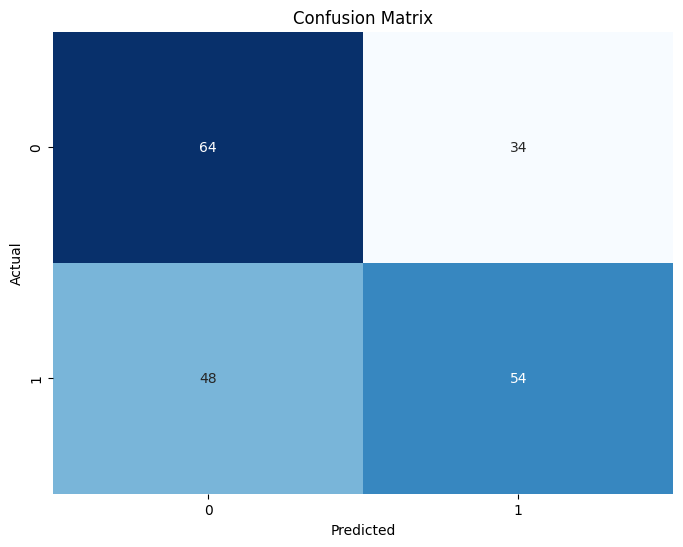

Accuracy: 0.59
Precision: 0.6136363636363636
Recall: 0.5294117647058824
F1 Score: 0.5684210526315789

Validation set approach:
Accuracy: 0.59

K-fold cross validation:
Accuracy: 0.517

Stratified K-fold cross validation:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.519

LOO strategy:
Accuracy: 0.521


In [ ]:
import numpy as np
import pandas as pd

# Generate synthetic data
np.random.seed(0)
num_samples = 1000

# Features
age = np.random.randint(25, 80, num_samples)
gender = np.random.choice(['Male', 'Female'], num_samples)
blood_pressure = np.random.randint(90, 180, num_samples)
cholesterol = np.random.randint(150, 400, num_samples)
blood_sugar = np.random.choice(['Normal', 'High'], num_samples)
exercise = np.random.choice(['Yes', 'No'], num_samples)
diet = np.random.choice(['Healthy', 'Unhealthy'], num_samples)
smoker = np.random.choice(['Yes', 'No'], num_samples)
alcohol_intake = np.random.choice(['Low', 'Moderate', 'High'], num_samples)
family_history = np.random.choice(['Yes', 'No'], num_samples)
symptoms = np.random.choice(['Yes', 'No'], num_samples)

# Target variable: Heart Disease (binary: 0 or 1)
heart_disease = np.random.randint(2, size=num_samples)

# Create DataFrame
data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'BloodPressure': blood_pressure,
    'Cholesterol': cholesterol,
    'BloodSugar': blood_sugar,
    'Exercise': exercise,
    'Diet': diet,
    'Smoker': smoker,
    'AlcoholIntake': alcohol_intake,
'FamilyHistory': family_history,
    'Symptoms': symptoms,
    'HeartDisease': heart_disease
})

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Gender', 'BloodSugar', 'Exercise', 'Diet', 'Smoker', 'AlcoholIntake', 'FamilyHistory', 'Symptoms'], drop_first=True)

# Display first few rows of the dataset
print(data.head())

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data into features and target variable
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# Validation set approach
print("\nValidation set approach:")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# K-fold cross validation
print("\nK-fold cross validation:")
k_fold_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
print(f'Accuracy: {k_fold_accuracy}')

# Stratified K-fold cross validation
print("\nStratified K-fold cross validation:")
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
stratified_k_fold_accuracy = cross_val_score(model, X, y, cv=skf, scoring='accuracy').mean()
print(f'Accuracy: {stratified_k_fold_accuracy}')


# Leave One Out (LOO) cross validation
print("\nLOO strategy:")
loo = LeaveOneOut()
loo_accuracy = cross_val_score(model, X, y, cv=loo, scoring='accuracy').mean()
print(f'Accuracy: {loo_accuracy}')


exp-4 polynomial regression


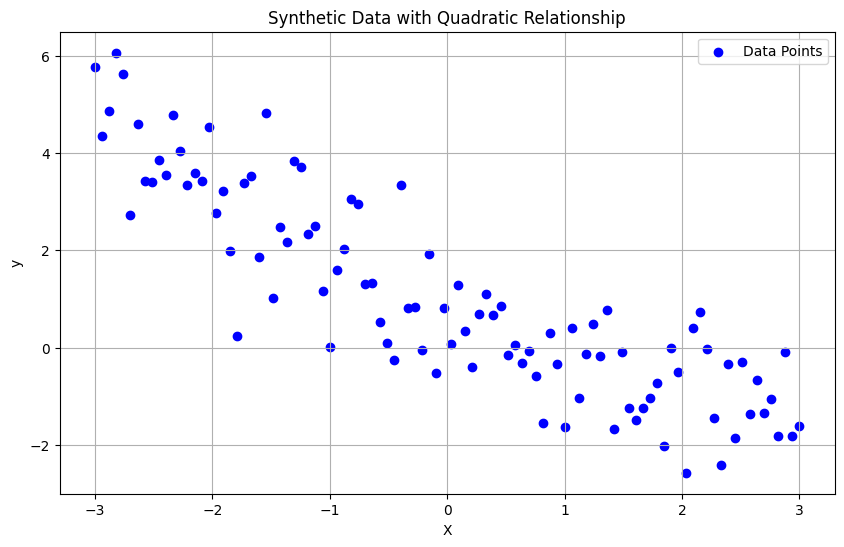

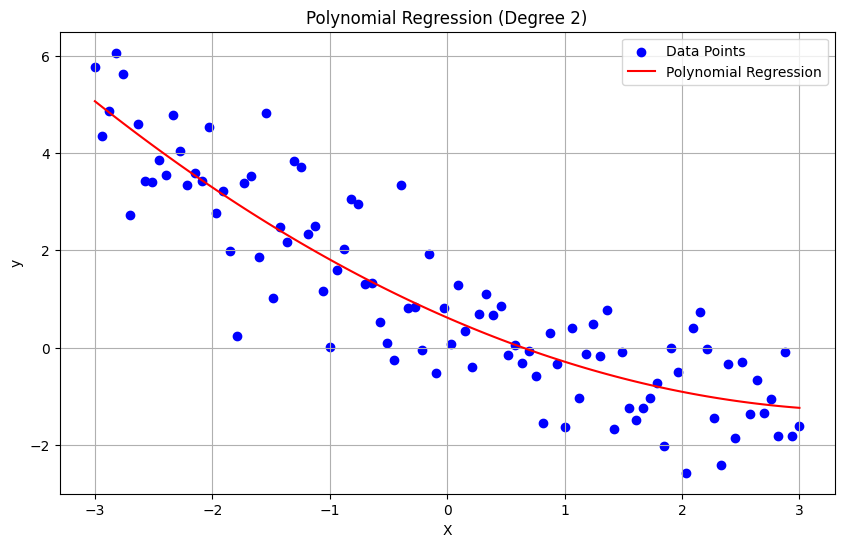

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Generating synthetic data with a quadratic relationship
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X - 3 * X + 1 + np.random.normal(0, 1, size=X.shape[0]).reshape(-1, 1)
# Visualizing the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data with Quadratic Relationship')
plt.legend()
plt.grid(True)
plt.show()
# Polynomial regression
degree = 2 # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
# Fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
# Predicting on the original data for visualization
y_pred = poly_model.predict(X_poly)
# Visualizing the polynomial regression model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

Class Distribution: Counter({0: 900, 1: 100})


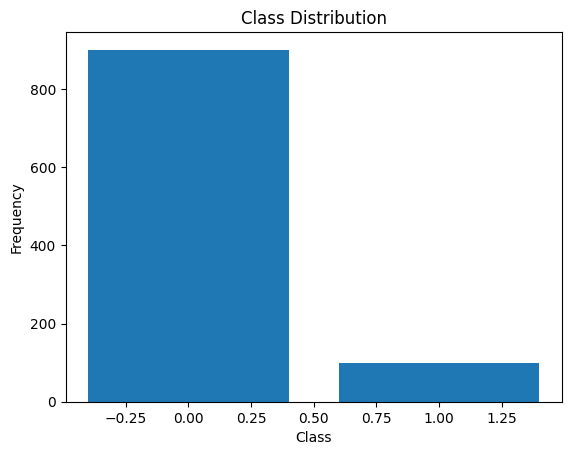


Classification Report for Imbalanced Data:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       184
          1       1.00      1.00      1.00      1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       200


Class Distribution after Random Over Sampling: Counter({0: 716, 1: 716})

Classification Report after Random Over Sampling:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      1.00      1.00      0.99       184
          1       0.94      1.00      0.99      0.97      1.00      1.00        16

avg / total       1.00      0.99      1.00      1.00      1.00      0.99       200


Class Distribution after Random Under Sampling: Counter({0: 84, 1: 84})

Classification Report after Random Under Sampling:
                   pre       rec    

exp-5 knn


Class Distribution: Counter({0: 900, 1: 100})


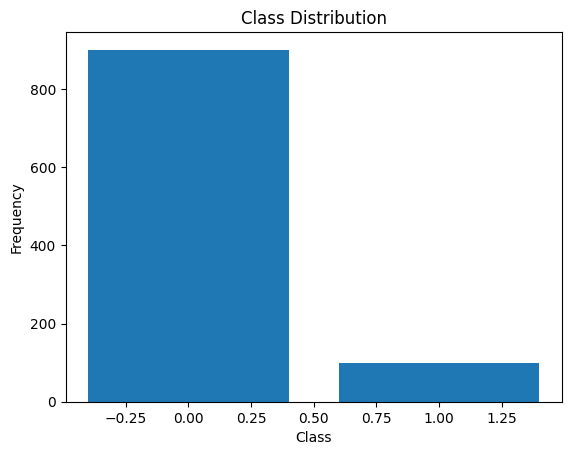


Classification Report for Imbalanced Data:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       184
          1       1.00      1.00      1.00      1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       200


Class Distribution after Random Over Sampling: Counter({0: 716, 1: 716})

Classification Report after Random Over Sampling:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      1.00      1.00      0.99       184
          1       0.94      1.00      0.99      0.97      1.00      1.00        16

avg / total       1.00      0.99      1.00      1.00      1.00      0.99       200


Class Distribution after Random Under Sampling: Counter({0: 84, 1: 84})

Classification Report after Random Under Sampling:
                   pre       rec    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1,
n_samples=1000, random_state=42)
counter = Counter(y)
print("Class Distribution:", counter)
plt.bar(counter.keys(), counter.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("\nClassification Report for Imbalanced Data:")
print(classification_report_imbalanced(y_test, y_pred))
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print("\nClass Distribution after Random Over Sampling:", Counter(y_ros))
knn_ros = KNeighborsClassifier()
knn_ros.fit(X_ros, y_ros)
y_pred_ros = knn_ros.predict(X_test)
print("\nClassification Report after Random Over Sampling:")
print(classification_report_imbalanced(y_test, y_pred_ros))
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print("\nClass Distribution after Random Under Sampling:", Counter(y_rus))
knn_rus = KNeighborsClassifier()
knn_rus.fit(X_rus, y_rus)
y_pred_rus = knn_rus.predict(X_test)
print("\nClassification Report after Random Under Sampling:")
print(classification_report_imbalanced(y_test, y_pred_rus))
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("\nClass Distribution after SMOTE:", Counter(y_smote))
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_smote, y_smote)
y_pred_smote = knn_smote.predict(X_test)
print("\nClassification Report after SMOTE:")
print(classification_report_imbalanced(y_test, y_pred_smote))

Class Distribution: Counter({0: 900, 1: 100})


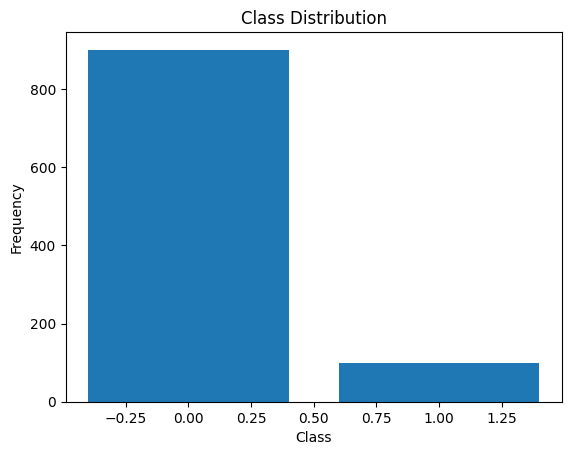


Classification Report for Imbalanced Data:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       184
          1       1.00      1.00      1.00      1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       200


Class Distribution after Random Over Sampling: Counter({0: 716, 1: 716})

Classification Report after Random Over Sampling:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      1.00      1.00      0.99       184
          1       0.94      1.00      0.99      0.97      1.00      1.00        16

avg / total       1.00      0.99      1.00      1.00      1.00      0.99       200


Class Distribution after Random Under Sampling: Counter({0: 84, 1: 84})

Classification Report after Random Under Sampling:
                   pre       rec    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

counter = Counter(y)
print("Class Distribution:", counter)
plt.bar(counter.keys(), counter.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("\nClassification Report for Imbalanced Data:")
print(classification_report_imbalanced(y_test, y_pred))

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print("\nClass Distribution after Random Over Sampling:", Counter(y_ros))

knn_ros = KNeighborsClassifier()
knn_ros.fit(X_ros, y_ros)
y_pred_ros = knn_ros.predict(X_test)

print("\nClassification Report after Random Over Sampling:")
print(classification_report_imbalanced(y_test, y_pred_ros))

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print("\nClass Distribution after Random Under Sampling:", Counter(y_rus))

knn_rus = KNeighborsClassifier()
knn_rus.fit(X_rus, y_rus)
y_pred_rus = knn_rus.predict(X_test)

print("\nClassification Report after Random Under Sampling:")
print(classification_report_imbalanced(y_test, y_pred_rus))

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("\nClass Distribution after SMOTE:", Counter(y_smote))

knn_smote = KNeighborsClassifier()
knn_smote.fit(X_smote, y_smote)
y_pred_smote = knn_smote.predict(X_test)

print("\nClassification Report after SMOTE:")
print(classification_report_imbalanced(y_test, y_pred_smote))

Class Distribution: Counter({0: 900, 1: 100})


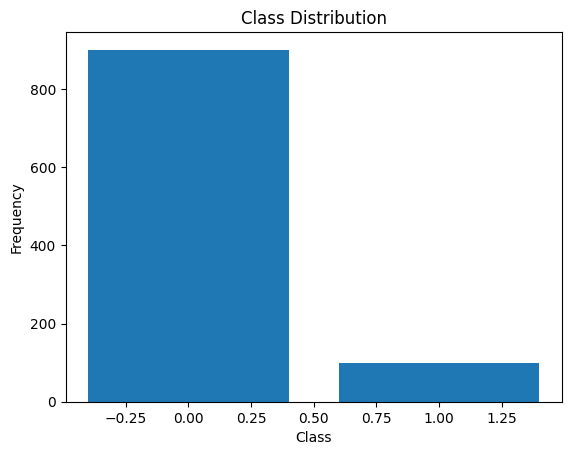


Classification Report for Imbalanced Data:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       184
          1       1.00      1.00      1.00      1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00      1.00      1.00      1.00       200


Class Distribution after Random Over Sampling: Counter({0: 716, 1: 716})

Classification Report after Random Over Sampling:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      1.00      1.00      0.99       184
          1       0.94      1.00      0.99      0.97      1.00      1.00        16

avg / total       1.00      0.99      1.00      1.00      1.00      0.99       200


Class Distribution after Random Under Sampling: Counter({0: 84, 1: 84})

Classification Report after Random Under Sampling:
                   pre       rec    

exp-6 random forest algorithm


In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
# Define a function for model evaluation
def evaluate_model(X, y, model):

  pipeline = make_pipeline(StandardScaler(), model)
  scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
  return np.mean(scores)
# Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
print("Univariate Feature Selection - Selected Features Indices:",
selector.get_support(indices=True))
print("Univariate Feature Selection - Model Accuracy:", evaluate_model(X_new, y,
RandomForestClassifier()))
# Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature Importance - Feature Rankings:", indices)
print("Feature Importance - Model Accuracy:", evaluate_model(X[:, indices[:10]], y,
RandomForestClassifier()))
# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
print("RFE - Selected Features Indices:", np.where(rfe.support_)[0])
print("RFE - Model Accuracy:", evaluate_model(X_rfe, y, RandomForestClassifier()))
# SelectFromModel
sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X, y)
print("SelectFromModel - Selected Features Indices:",
np.where(sfm.get_support())[0])
print("SelectFromModel - Model Accuracy:", evaluate_model(sfm.transform(X), y,
RandomForestClassifier()))
# Correlation Matrix
corr_matrix = pd.DataFrame(X).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_corr = np.delete(X, to_drop, axis=1)
print("Correlation Matrix - Features Removed:", to_drop)
print("Correlation Matrix - Model Accuracy:", evaluate_model(X_corr, y,
RandomForestClassifier()))
# Variance Thresholding
vt = VarianceThreshold(threshold=0.1)
X_vt = vt.fit_transform(X)
print("Variance Thresholding - Selected Features Indices:",
np.where(vt.get_support())[0])
print("Variance Thresholding - Model Accuracy:", evaluate_model(X_vt, y,
RandomForestClassifier()))

Univariate Feature Selection - Selected Features Indices: [ 0  2  3  6  7 20 22 23 26 27]
Univariate Feature Selection - Model Accuracy: 0.9455519329296692
Feature Importance - Feature Rankings: [23 27  7 20 22  2  6  3 26  0 13 25 21  1 10 24  5 12 28  4 19 16 15 14
 29 17 11 18  8  9]
Feature Importance - Model Accuracy: 0.9490451793199813
RFE - Selected Features Indices: [ 0  5  6 11 20 24 25 26 27 28]
RFE - Model Accuracy: 0.9525694767893184
SelectFromModel - Selected Features Indices: [ 2  3  6  7 20 22 23 27]
SelectFromModel - Model Accuracy: 0.947290793355069
Correlation Matrix - Features Removed: [2, 3, 12, 13, 20, 22, 23]
Correlation Matrix - Model Accuracy: 0.956078248719143
Variance Thresholding - Selected Features Indices: [ 0  1  2  3 11 12 13 20 21 22 23]
Variance Thresholding - Model Accuracy: 0.9437975469647568


exp-7 bayes classification


In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
# Initialize and train Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# Evaluate model on test set
y_pred = nb_model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)
print("Accuracy without Dimension Reduction:", accuracy_original)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Apply PCA
pca = PCA(n_components=10) # Let's reduce to 10 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Apply LDA
lda = LDA(n_components=1) # We reduce to 1 component for binary classification
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
# Train and evaluate Gaussian Naive Bayes model on PCA-reduced data
nb_model_pca = GaussianNB()
nb_model_pca.fit(X_train_pca, y_train)
y_pred_pca = nb_model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA Dimension Reduction:", accuracy_pca)
# Train and evaluate Gaussian Naive Bayes model on LDA-reduced data
nb_model_lda = GaussianNB()
nb_model_lda.fit(X_train_lda, y_train)
y_pred_lda = nb_model_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy with LDA Dimension Reduction:", accuracy_lda)
print("\nModel Performance Comparison:")
print("Original Data Accuracy:", accuracy_original)
print("PCA Dimension Reduction Accuracy:", accuracy_pca)
print("LDA Dimension Reduction Accuracy:", accuracy_lda)

Accuracy without Dimension Reduction: 0.9415204678362573
Accuracy with PCA Dimension Reduction: 0.8947368421052632
Accuracy with LDA Dimension Reduction: 0.9590643274853801

Model Performance Comparison:
Original Data Accuracy: 0.9415204678362573
PCA Dimension Reduction Accuracy: 0.8947368421052632
LDA Dimension Reduction Accuracy: 0.9590643274853801


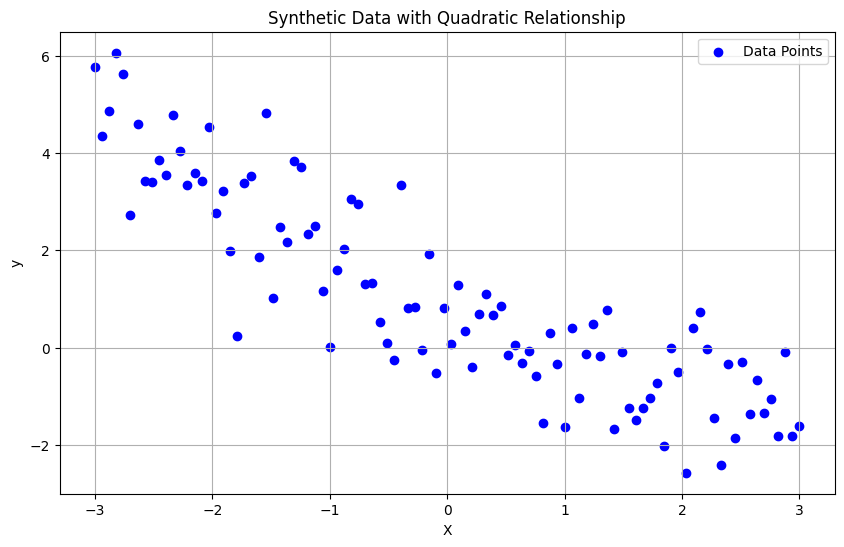

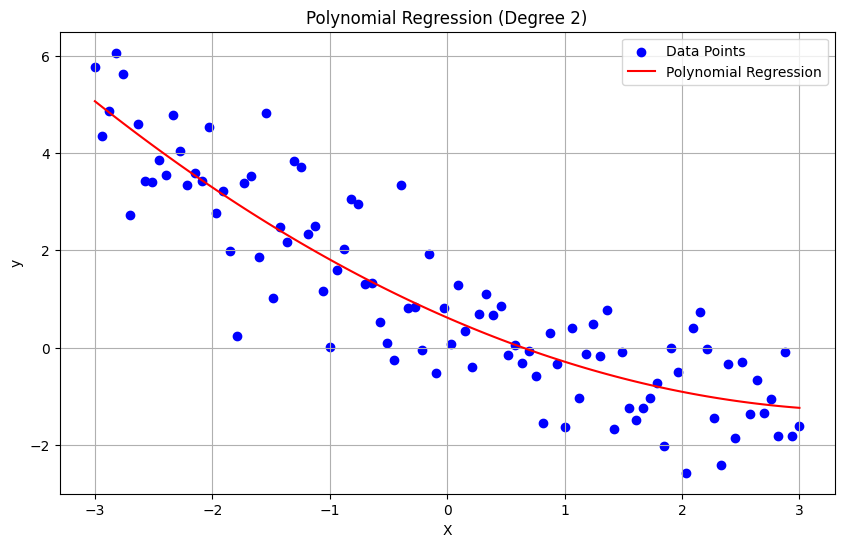

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Generating synthetic data with a quadratic relationship
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X - 3 * X + 1 + np.random.normal(0, 1, size=X.shape[0]).reshape(-1, 1)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data with Quadratic Relationship')
plt.legend()
plt.grid(True)
plt.show()
# Polynomial regression
degree = 2 # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
# Fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
# Predicting on the original data for visualization
y_pred = poly_model.predict(X_poly)
# Visualizing the polynomial regression model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()